<a href="https://colab.research.google.com/github/pankajjaat2004/Geek-Room-AI-ML-Department/blob/main/Houseprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT LIBERARIES**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

# **DATA PREPROCESSING**

In [27]:
dataset = pd.read_csv("/content/1553768847-housing.csv")

In [28]:
dataset


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [29]:
dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [30]:
dataset['total_bedrooms']=dataset['total_bedrooms'].fillna(dataset['total_bedrooms'].mean())
#dataset.dropna(inplace = True)
dataset.isnull().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [31]:

#dataset = dataset.join(pd.get_dummies(dataset.ocean_proximity)).drop(["ocean_proximity","ISLAND"],axis = 1)

dataset["ocean_proximity"].replace(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],[0,1,2,3,4], inplace=True)
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,342200


# **Splitting test train**

In [32]:
from sklearn.model_selection import train_test_split

   # independent variable
X = dataset.drop(["median_house_value"],axis=1)

   # dependent variable
Y = dataset["median_house_value"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)
train_data = X_train.join(Y_train)

# **TRAIN DATA**

<Axes: >

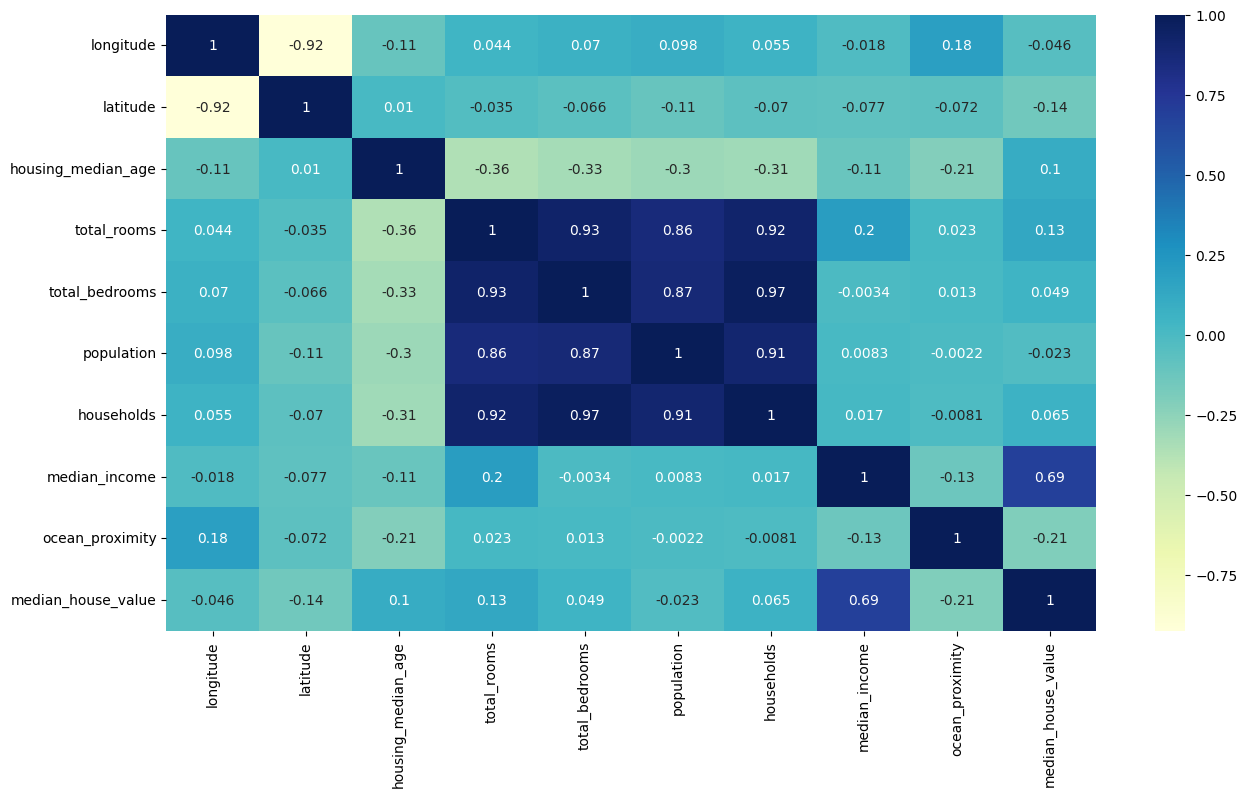

In [33]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [34]:
train_data['total_rooms'] =np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] =np.log(train_data['total_bedrooms'] + 1)
train_data['population'] =np.log(train_data['population'] + 1)
train_data['households'] =np.log(train_data['households'] + 1)


In [35]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['households_ratio'] = train_data['total_rooms'] / train_data['households']

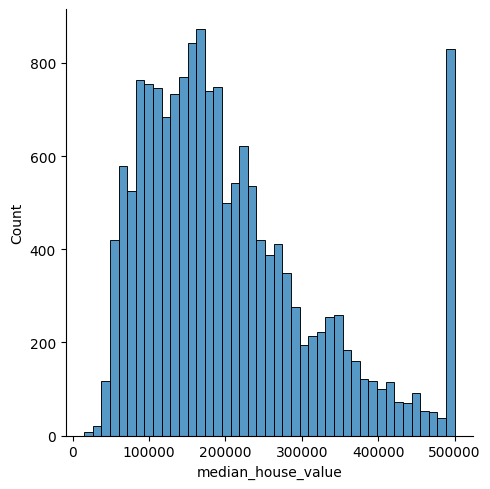

In [36]:
sns.displot(train_data['median_house_value'])

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'ocean_proximity'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': 'bedroom_ratio'}>,
        <Axes: title={'center': 'households_ratio'}>]], dtype=object)

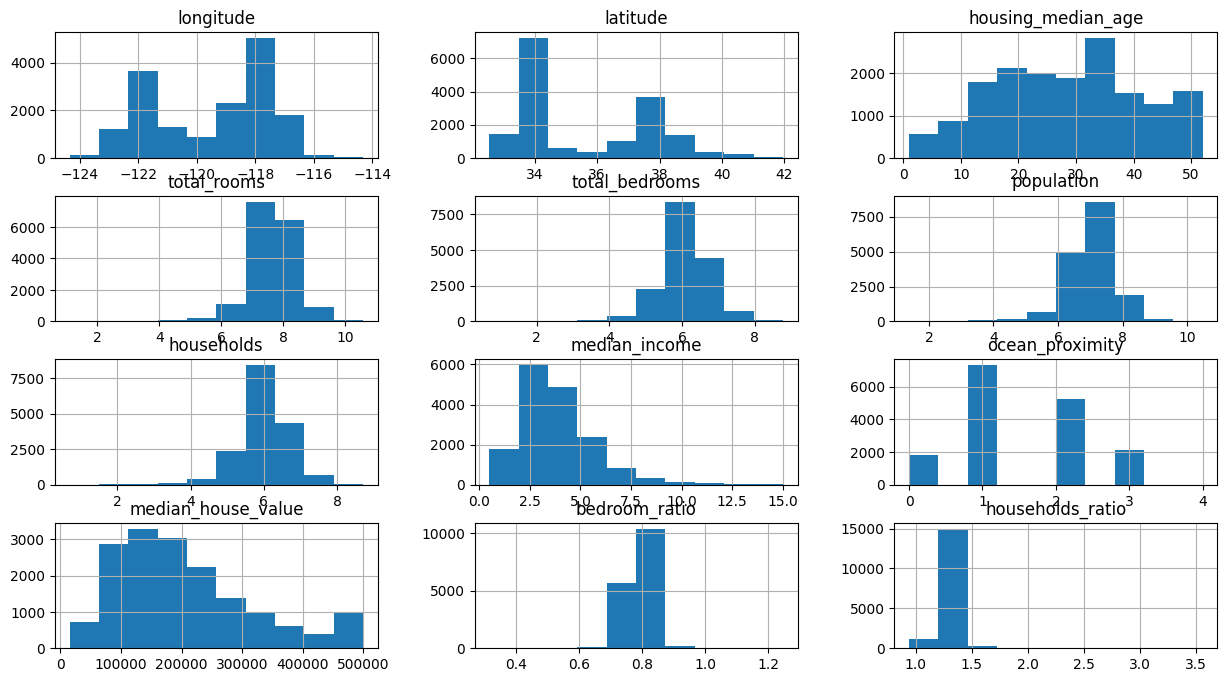

In [37]:
train_data.hist(figsize = (15,8))

# **Model building**

In [38]:
from sklearn.linear_model import LinearRegression

X_train, Y_train = train_data.drop(['median_house_value'],axis = 1),train_data['median_house_value']

lr= LinearRegression()
lr.fit(X_train, Y_train)



LinearRegression()

# **TEST DATA**

In [39]:
test_data = X_test.join(Y_test)

test_data['total_rooms'] =np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] =np.log(test_data['total_bedrooms'] + 1)
test_data['population'] =np.log(test_data['population'] + 1)
test_data['households'] =np.log(test_data['households'] + 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['households_ratio'] = test_data['total_rooms'] / test_data['households']

X_test, Y_test = test_data.drop(['median_house_value'],axis = 1),test_data['median_house_value']

In [40]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,bedroom_ratio,households_ratio
1462,-122.00,37.96,32,8.121183,6.502790,7.591357,6.520621,3.7000,2,179000,0.800720,1.245462
8874,-118.45,34.06,52,5.323010,3.555348,7.051856,3.367296,9.3370,1,500001,0.667921,1.580797
9790,-121.84,36.25,20,6.865891,5.505332,6.381816,5.247024,2.6094,3,362500,0.801838,1.308531
11142,-117.95,33.84,34,7.114769,5.375278,6.943122,5.389072,3.5455,1,180000,0.755510,1.320222
6450,-118.04,34.12,44,7.604894,5.666427,6.826545,5.730100,6.5989,2,500001,0.745103,1.327184
...,...,...,...,...,...,...,...,...,...,...,...,...
10239,-117.88,33.90,15,7.441907,6.171701,6.633318,6.173786,3.5333,1,114400,0.829317,1.205404
7126,-118.09,34.03,27,8.242230,6.393591,7.622664,6.421622,5.5000,1,276800,0.775711,1.283512
12503,-121.43,38.56,41,7.008505,5.429346,6.095825,5.351858,3.1827,2,131700,0.774680,1.309546
12236,-116.95,33.74,18,7.599401,6.006353,7.147559,5.993961,2.7083,2,91200,0.790372,1.267843


In [41]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,bedroom_ratio,households_ratio
15832,-122.43,37.75,52,7.734559,6.234411,6.733402,6.124683,4.7946,0,355600,0.806046,1.262850
11414,-117.98,33.69,22,8.283494,6.255750,7.481556,6.269096,7.0907,1,350200,0.755207,1.321322
5582,-118.30,33.82,35,7.313220,5.831882,7.040536,5.789960,2.6136,1,213600,0.797444,1.263086
2864,-118.91,35.37,32,8.324094,6.628041,7.859799,6.582025,3.3462,2,67600,0.796248,1.264671
8297,-118.14,33.76,50,7.993282,6.635947,7.073270,6.577861,3.5214,3,398100,0.830190,1.215180
...,...,...,...,...,...,...,...,...,...,...,...,...
5284,-118.47,34.05,25,7.897296,6.579251,7.114769,6.498282,3.5909,1,500001,0.833102,1.215290
19348,-122.85,38.62,16,8.393669,6.558198,7.554335,6.548219,4.5913,1,244600,0.781327,1.281825
16902,-122.35,37.58,52,7.822445,6.129050,6.986566,6.156979,4.0855,3,410800,0.783521,1.270500
8125,-118.18,33.82,43,7.701200,6.152733,6.949856,6.037871,3.5000,3,216700,0.798932,1.275483


# **Evaluvation**

In [42]:
lr.score(X_test, Y_test)

0.6754205007011858

In [43]:
y_pred = lr.predict(X_test)
y_pred

array([347862.06164125, 315326.63821666, 166417.58374866, ...,
       279831.05845387, 233834.49509613, 189498.54019034])

In [44]:
#Evaluvation: MAE,MSE,RMSE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('The Mean Absolute Error(MAE) is: ', mean_absolute_error(Y_test,y_pred))
print('The Mean Square Error(MSE) is: ', mean_squared_error(Y_test,y_pred))
print('The Root Mean Square Error(RMSE) is: ', np.sqrt(mean_squared_error(Y_test,y_pred)))

The Mean Absolute Error(MAE) is:  48215.905184729345
The Mean Square Error(MSE) is:  4337174190.572919
The Root Mean Square Error(RMSE) is:  65857.22580380166


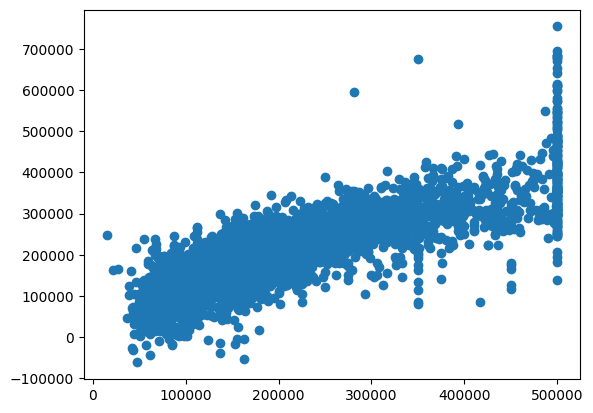

In [45]:
plt.scatter(Y_test,y_pred)